In [100]:
import numpy as np
import matplotlib.pyplot as plt
n=250
X = np.random.randint(0, 100, n)
Y = X**1.5 + np.random.randint(200, 400, n)

In [101]:
def averageCost(m, q):
    return np.mean(np.sqrt(np.square(Y - q - m*X)))

In [102]:
m, q = 0, 0
alpha = 1
keep = True
gradient_m = np.sum((Y - q - m*X) * X)
gradient_q = np.sum((Y - q - m*X))
costNow = averageCost(m, q)
while keep:
    costThen = averageCost(m+gradient_m*alpha, q+gradient_q*alpha)
    if costThen<costNow:
        keep = False
    else:
        alpha /= 1.1
m += gradient_m*alpha
q += gradient_q*alpha
keep = True
gradient_m = np.sum((Y - q - m*X) * X)
gradient_q = np.sum((Y - q - m*X))
costNow = averageCost(m, q)
while keep:
    costThen = averageCost(m+gradient_m*alpha, q+gradient_q*alpha)
    if costThen<costNow:
        keep = False
    else:
        alpha /= 1.1

In [103]:
norm=1
while norm>0.1:
    gradient_m = np.sum((Y - q - m*X) * X)
    gradient_q = np.sum((Y - q - m*X))
    m += gradient_m*alpha
    q += gradient_q*alpha  
    norm = np.sqrt((gradient_m**2)+(gradient_q**2))
print("average cost:", averageCost(m,q))
print("gradient norm:", norm)
print("m:", m, "q:", q)

average cost: 58.3273071433609
gradient norm: 0.09999941326987978
m: 9.979153442035003 q: 199.0959229308342


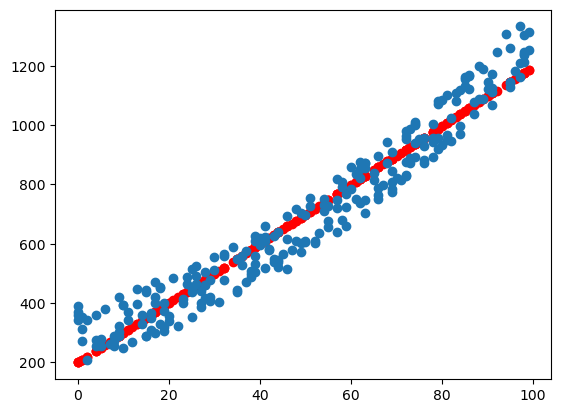

In [104]:
plt.scatter(X, m * X + q, color="red")
plt.scatter(X, Y)
plt.show()